# A/B testing Analysis for E-Commerce website purchase using LogisticRegression and XGBoost model

## 1.Load the dataset
## 2.Explore and clean the data
## 3.Compare conversion rates of group A and B
## 4.Use a t-test to check if the diffrence is real
## 5.Interpret the result (p-Value)

### Step1- Load the Dataset

In [7]:
import pandas as pd

# Load the CSV file
df = pd.read_csv(r"C:\Users\Shehan\Downloads\ab_test_100k_dataset.csv")

# show first 5 rows
df.head()

,user_id,group,device,location,age,time_on_page,purchase
0,1,A,desktop,UK,53,80.0,0
1,2,B,mobile,India,65,71.0,0
2,3,A,mobile,Germany,69,45.0,0
3,4,A,desktop,India,42,53.0,0
4,5,A,mobile,USA,57,77.0,0


### Step2- Check the basic information

In [9]:
# shape and data types
print(df.shape)
print(df.info())

# Any missing values?
print(df.isnull().sum())

(100000, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user_id       100000 non-null  int64  
 1   group         100000 non-null  object 
 2   device        100000 non-null  object 
 3   location      100000 non-null  object 
 4   age           100000 non-null  int64  
 5   time_on_page  100000 non-null  float64
 6   purchase      100000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB
None
user_id         0
group           0
device          0
location        0
age             0
time_on_page    0
purchase        0
dtype: int64


### Step3- Group wise conversion rate(purchase rate)

In [23]:
# Calculate purchase rate for each group
conversion_rates = df.groupby('group')['purchase'].mean()

print(conversion_rates)

# Convert to percentage with 2 decimal places
conversion_rates_percent = (conversion_rates * 100).map('{:.2f}%'.format)

print(conversion_rates_percent)


group
A    0.099706
B    0.129357
Name: purchase, dtype: float64
group
A     9.97%
B    12.94%
Name: purchase, dtype: object


### so group B is better . But is it real? Then check

### Step4- Perform a t-test

In [27]:
from scipy.stats import ttest_ind    #import t test independent

#Seperate the groups
group_A = df[df['group'] == 'A']['purchase']

group_B = df[df['group'] == 'B']['purchase']

# Run independent t-test
t_stat, p_val = ttest_ind(group_B, group_A)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

T-statistic: 14.7368
P-value: 0.0000


### Step5- Interpret the result

### here p value= 0 < 0.05 ,so it's statistically significant
### so Group B really increased purchases


###  Visualize the results

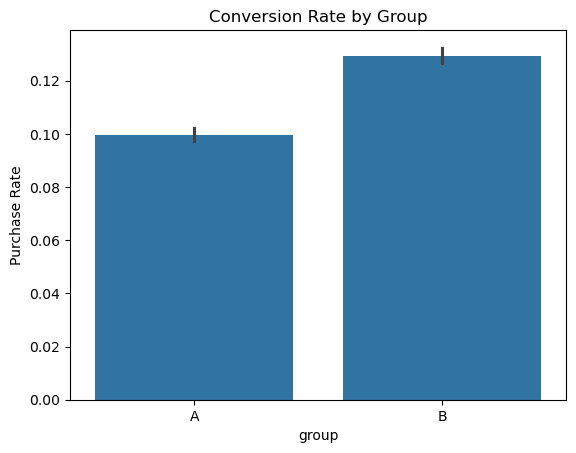

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data= df, x='group', y='purchase')
plt.title('Conversion Rate by Group')
plt.ylabel('Purchase Rate')
plt.show()

# Apply Mechine Learning in this Project

### Step1- Load and Prepare the Data

In [30]:
import pandas as pd

# Load the data
df = pd.read_csv(r"C:\Users\Shehan\Downloads\ab_test_100k_dataset.csv")

# Drop user_id (not useful for prediction)
df = df.drop(columns=['user_id'])

### Step2- Encode Categorical Variables (group,device,location)

In [31]:
# one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()

,age,time_on_page,purchase,group_B,device_mobile,device_tablet,location_Germany,location_India,location_UK,location_USA
0,53,80.0,0,False,False,False,False,False,True,False
1,65,71.0,0,True,True,False,False,True,False,False
2,69,45.0,0,False,True,False,True,False,False,False
3,42,53.0,0,False,False,False,False,True,False,False
4,57,77.0,0,False,True,False,False,False,False,True


### Step3- Split Train/Test

In [33]:
from sklearn.model_selection import train_test_split

# features (X) and target (y)
X = df_encoded.drop('purchase', axis=1)

y = df_encoded['purchase']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

### Step4- Train the Model (Logistic Regression)

In [35]:
from sklearn.linear_model import LogisticRegression

# Train model
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Step5- Evaluate Performance

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_pred = model.predict(X_test)

# Evaluate 
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8890333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     26671
           1       0.00      0.00      0.00      3329

    accuracy                           0.89     30000
   macro avg       0.44      0.50      0.47     30000
weighted avg       0.79      0.89      0.84     30000



C:\Users\Shehan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shehan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shehan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Step6- Show Feature Importance

In [39]:
# Coefficients (importance)
coeffs = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_[0]
}).sort_values(by= 'Importance', ascending = False)

coeffs

,Feature,Importance
2,group_B,0.287910
6,location_India,0.071290
5,location_Germany,0.044977
4,device_tablet,0.022203
7,location_UK,0.020183
3,device_mobile,0.014391
1,time_on_page,-0.000427
0,age,-0.001013
8,location_USA,-0.009439


# XGBoost model apply in this A/B testing

### Step1- Import Libraries

In [25]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Step2- Prepare the Data

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv(r"C:\Users\Shehan\Downloads\ab_test_100k_dataset.csv").drop(columns=['user_id'])

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Split into features and target
X = df_encoded.drop('purchase', axis=1)
y = df_encoded['purchase']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Step3- Train XGboost Model

In [27]:
#  Count of each class
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
scale_pos_weight = neg / pos
print("Scale pos weight:", scale_pos_weight)

# Initialize model
model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                              scale_pos_weight=scale_pos_weight, random_state = 42)

#Fit  Model
model_xgb.fit(X_train, y_train)

Scale pos weight: 7.614324390844204


C:\Users\Shehan\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:15:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

### Step4- Evaluate Performance

In [28]:
# Predict
y_pred_xgb = model_xgb.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print('\nClassification Report:\n', classification_report(y_test,y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

Accuracy: 0.5980666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.62      0.73     26671
           1       0.12      0.40      0.18      3329

    accuracy                           0.60     30000
   macro avg       0.51      0.51      0.46     30000
weighted avg       0.81      0.60      0.67     30000

Confusion Matrix:
 [[16596 10075]
 [ 1983  1346]]


### Step5- Feature Importance (XGBoost)

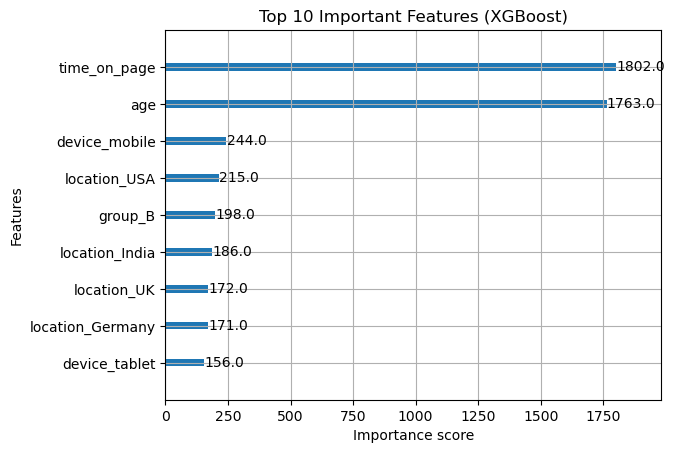

In [29]:
import matplotlib.pyplot as plt

# plot feature importance
xgb.plot_importance(model_xgb, max_num_features= 10)
plt.title('Top 10 Important Features (XGBoost)')
plt.show()

# Compare LogisticRegression with XGboost Table

### LogisticRegression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train logistic regression
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

# Predict
y_pred_lr = model_lr.predict(X_test)

# Metrics
acc_lr = accuracy_score(y_test, y_pred_lr)
print("\n  Logistic Regression")
print("Accuracy:", acc_lr)
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))



  Logistic Regression
Accuracy: 0.8890333333333333
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     26671
           1       0.00      0.00      0.00      3329

    accuracy                           0.89     30000
   macro avg       0.44      0.50      0.47     30000
weighted avg       0.79      0.89      0.84     30000

Confusion Matrix:
 [[26671     0]
 [ 3329     0]]


C:\Users\Shehan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shehan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shehan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### XGBoost

In [31]:
import xgboost as xgb

# Train XGBoost
model_xgb = xgb.XGBClassifier(use_label_encoder= False, eval_metric= 'logloss',
                              scale_pos_weight=scale_pos_weight, random_state = 42)
model_xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = model_xgb.predict(X_test)

# Metrics
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print("\n  XGBoost")
print("Accuracy:", acc_xgb)
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


  XGBoost
Accuracy: 0.5980666666666666
              precision    recall  f1-score   support

           0       0.89      0.62      0.73     26671
           1       0.12      0.40      0.18      3329

    accuracy                           0.60     30000
   macro avg       0.51      0.51      0.46     30000
weighted avg       0.81      0.60      0.67     30000

Confusion Matrix:
 [[16596 10075]
 [ 1983  1346]]


C:\Users\Shehan\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:15:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# Feature Importance (XGBoost) plot top features

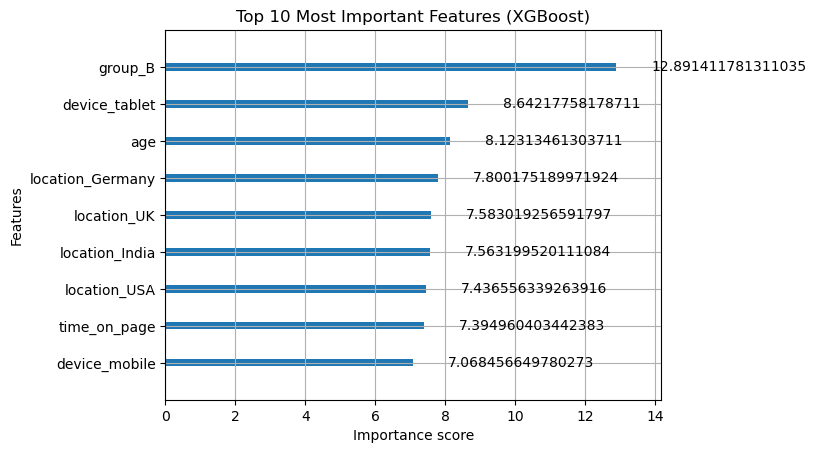

In [32]:
import matplotlib.pyplot as plt
import xgboost as xgb

# plot top 10 features
xgb.plot_importance(model_xgb, max_num_features=10, importance_type='gain')
plt.title("Top 10 Most Important Features (XGBoost)")
plt.show()